In [2]:
import pandas as pd
import matplotlib.pyplot as plt # viz library
import seaborn as sns # HD viz library
import numpy as np # to work with numbers (numerical python)
import scipy.stats as stats
from scipy.stats import chi2_contingency
pd.options.mode.chained_assignment = None
df = pd.read_csv('sleep_cycle_productivity.csv')

In [3]:
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [ ]:
df.shape

(5000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

In [ ]:
df.isnull().sum()
# check for non values

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

In [ ]:
df.isnull().values.any()
# no missing values in the data frame

np.False_

In [ ]:
int(df.duplicated().sum())
# check for duplicated values

0

In [ ]:
# prson id has repeated values.
df["Person_ID"].duplicated().sum()

np.int64(1142)

In [ ]:
df_unique = df.copy()

In [ ]:
#keep only the first entry for each person_id (removes duplicates)
df_unique = df.drop_duplicates(subset='Person_ID', keep='first')
print(f"Number of unique entries: {df_unique.shape[0]}")


Number of unique entries: 3858


In [ ]:
# df_unique["Date"] = pd.to_datetime(df_unique["Date"])
df_unique = df_unique.drop(columns=["Date"])

In [ ]:
df_unique.shape

(3858, 14)

In [ ]:
print(df_unique.dtypes)

Person_ID                          int64
Age                                int64
Gender                            object
Sleep Start Time                 float64
Sleep End Time                   float64
Total Sleep Hours                float64
Sleep Quality                      int64
Exercise (mins/day)                int64
Caffeine Intake (mg)               int64
Screen Time Before Bed (mins)      int64
Work Hours (hrs/day)             float64
Productivity Score                 int64
Mood Score                         int64
Stress Level                       int64
dtype: object


In [ ]:
# renaming columns to follow PEP8
df_unique.rename(columns={'Person_ID': 'person_id', 
    'Age': 'age', 
    'Gender': 'gender', 
    'Sleep Start Time': 'sleep_start_time', 
    'Sleep End Time': 'sleep_end_time', 
    'Total Sleep Hours': 'total_sleep_hours', 
    'Sleep Quality': 'sleep_quality', 
    'Exercise (mins/day)': 'excercise_mins_per_day',
    'Caffeine Intake (mg)': 'caffeine_intake_mg', 
    'Screen Time Before Bed (mins)': 'screen_mins_before_bed', 
    'Work Hours (hrs/day)': 'work_hours_per_day', 
    'Productivity Score': 'productivity_score', 
    'Mood Score': 'mood_score', 
    'Stress Level': 'stress_level'
}, inplace=True)


In [ ]:
df_unique.columns

Index(['person_id', 'age', 'gender', 'sleep_start_time', 'sleep_end_time',
       'total_sleep_hours', 'sleep_quality', 'excercise_mins_per_day',
       'caffeine_intake_mg', 'screen_mins_before_bed', 'work_hours_per_day',
       'productivity_score', 'mood_score', 'stress_level'],
      dtype='object')

In [ ]:
df_unique['work_hours_per_day'] = round(df_unique['work_hours_per_day'], 2)

In [ ]:
def convert_hours_minutes(decimal_hours):
    hours = int(decimal_hours)
    minutes = round((decimal_hours - hours) * 60)
    return f"{hours}:{minutes:02d}"

df_unique["sleep_start_time"] = df_unique["sleep_start_time"].apply(convert_hours_minutes)
df_unique["sleep_end_time"] = df_unique["sleep_end_time"].apply(convert_hours_minutes)


In [ ]:
num = df_unique.select_dtypes(include="number")
cat = df_unique.select_dtypes(exclude="number")
# define the categorical and numerical variables.

In [ ]:
cat_columns = ['sleep_quality', 'productivity_score', 'mood_score', 'stress_level']
cat[cat_columns] = df_unique[cat_columns]
num = num.drop(columns=cat_columns)
# scores are better defined as categories, so added them to cat.

In [ ]:
# df_unique['sleep_quality'] = df_unique['sleep_quality'].astype('category')
# df_unique['productivity_score'] = df_unique['productivity_score'].astype('category')
# df_unique['mood_score'] = df_unique['mood_score'].astype('category')
# df_unique['stress_level'] = df_unique['stress_level'].astype('category')

In [ ]:
cat

,gender,sleep_start_time,sleep_end_time,sleep_quality,productivity_score,mood_score,stress_level
0,Other,23:20,4:37,3,8,3,6
1,Female,21:01,2:26,5,10,3,7
2,Male,22:06,3:27,7,10,9,10
3,Other,23:06,6:39,8,8,4,2
4,Other,21:25,4:10,10,8,7,9
...,...,...,...,...,...,...,...
4994,Other,23:56,5:40,5,8,2,1
4995,Female,22:47,4:09,1,5,2,1
4996,Male,21:29,5:23,4,5,6,2
4998,Other,23:28,7:52,9,8,1,6


In [ ]:
# list of categorical variables that I want to corelate for easier access.
categorical_scores = ["sleep_quality", "stress_level", "mood_score", "productivity_score"]
num_var = ['total_sleep_hours', 'excercise_mins_per_day', 'caffeine_intake_mg',	'screen_mins_before_bed', 'work_hours_per_day',]
df_num_var = df_unique[num_var]



In [ ]:
num

,person_id,age,total_sleep_hours,excercise_mins_per_day,caffeine_intake_mg,screen_mins_before_bed,work_hours_per_day
0,1860,32,5.28,86,87,116,8.81
1,1769,41,5.41,32,21,88,6.33
2,2528,20,5.35,17,88,59,8.51
3,8041,37,7.55,46,34,80,6.07
4,4843,46,6.75,61,269,94,11.37
...,...,...,...,...,...,...,...
4994,1594,30,5.73,88,95,100,7.93
4995,5192,38,5.37,55,216,96,9.38
4996,7134,55,7.91,70,81,177,5.02
4998,4205,55,8.40,15,87,161,7.09


In [ ]:
cat.describe()

,sleep_quality,productivity_score,mood_score,stress_level
count,3858.000000,3858.000000,3858.000000,3858.000000
mean,5.545101,5.649041,5.381545,5.544323
std,2.862625,2.870410,2.831833,2.887885
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,6.000000,6.000000,5.000000,6.000000
75%,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [ ]:
sleep_quality_counts = df_unique['sleep_quality'].value_counts()
print(sleep_quality_counts)


sleep_quality
7     408
10    406
5     399
2     391
4     386
6     379
9     377
3     376
8     375
1     361
Name: count, dtype: int64


In [ ]:
num.describe()

,person_id,age,total_sleep_hours,excercise_mins_per_day,caffeine_intake_mg,screen_mins_before_bed,work_hours_per_day
count,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000
mean,5513.498186,38.685329,6.981516,43.828668,146.871695,91.222913,7.994982
std,2597.471330,12.256315,1.456653,25.912858,85.157076,52.074686,2.266844
min,1000.000000,18.000000,4.500000,0.000000,0.000000,0.000000,4.000000
25%,3255.750000,28.000000,5.680000,21.000000,74.000000,46.000000,6.070000
50%,5577.000000,39.000000,6.965000,44.000000,144.000000,92.000000,7.990000
75%,7746.750000,49.000000,8.210000,66.000000,219.000000,135.000000,9.890000
max,9998.000000,59.000000,9.500000,89.000000,299.000000,179.000000,12.000000


In [ ]:
gender_percentages = df_unique['gender'].value_counts(normalize=True)*100
gender_counts = df_unique["gender"].value_counts()
for gender, count, percent in zip(gender_counts.index, gender_counts, gender_percentages):
    print(f"{gender}: {count}, {percent:.1f}%")

Male: 1338, 34.7%
Female: 1293, 33.5%
Other: 1227, 31.8%


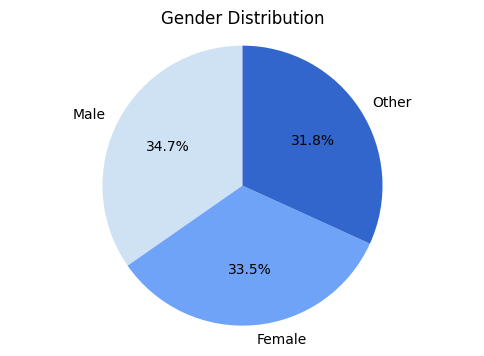

In [ ]:
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=["#cfe2f3", "#6fa3f8", "#3366cc"])
plt.title("Gender Distribution")
plt.axis("equal")  #equal aspect ratio ensures that pie chart is a circle.
plt.show()

Text(0.5, 1.0, 'Total Working Hours per day')

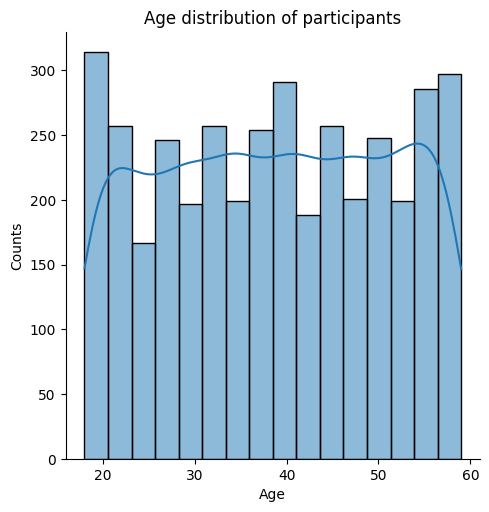

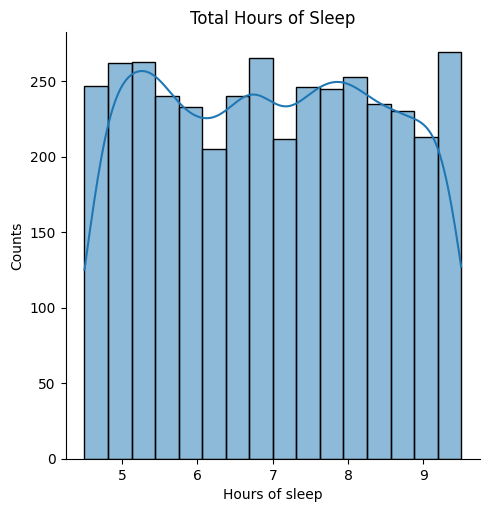

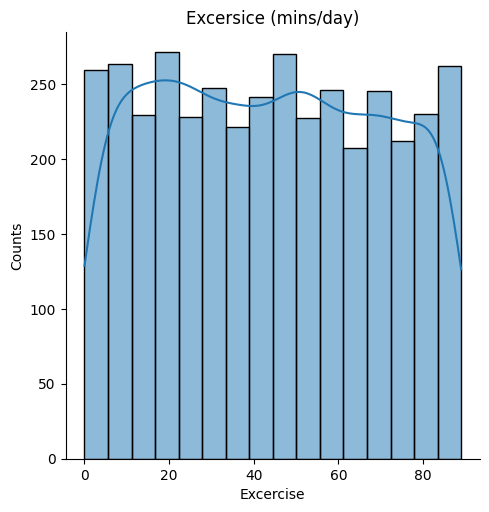

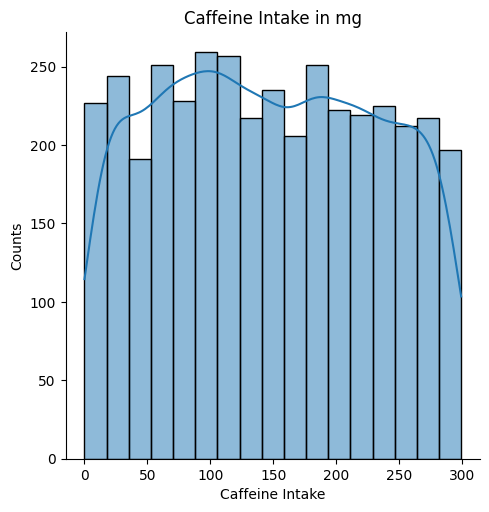

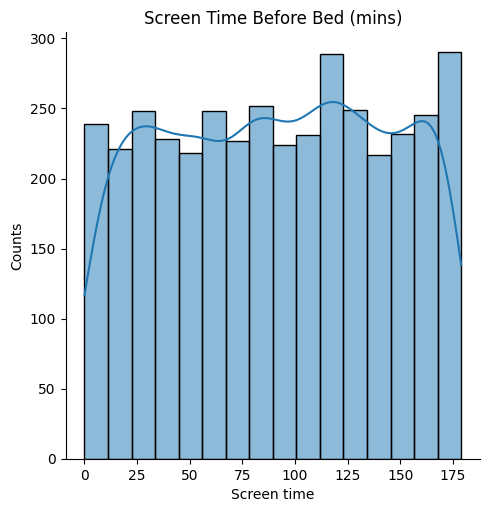

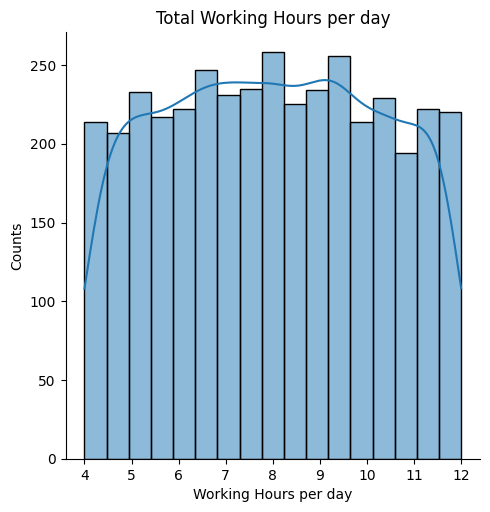

In [ ]:
sns.displot( data=num["age"], kde=True )
plt.xlabel("Age")  # X-axis label
plt.ylabel("Counts");  # Y-axis label
plt.title("Age distribution of participants")  # Add a title
sns.displot( data=num["total_sleep_hours"], kde=True )
plt.xlabel("Hours of sleep")  # X-axis label
plt.ylabel("Counts")  # Y-axis label
plt.title("Total Hours of Sleep")  # Add a title
sns.displot( data=num["excercise_mins_per_day"], kde=True )
plt.xlabel("Excercise")  # X-axis label
plt.ylabel("Counts")  # Y-axis label
plt.title("Excersice (mins/day)")  # Add a title
sns.displot( data=num["caffeine_intake_mg"], kde=True )
plt.xlabel("Caffeine Intake")  # X-axis label
plt.ylabel("Counts")  # Y-axis label
plt.title("Caffeine Intake in mg")  # Add a title
sns.displot( data=num["screen_mins_before_bed"], kde=True )
plt.xlabel("Screen time")  # X-axis label
plt.ylabel("Counts")  # Y-axis label
plt.title("Screen Time Before Bed (mins)")  # Add a title
sns.displot( data=num["work_hours_per_day"], kde=True )
plt.xlabel("Working Hours per day")  # X-axis label
plt.ylabel("Counts")  # Y-axis label
plt.title("Total Working Hours per day")  # Add a title


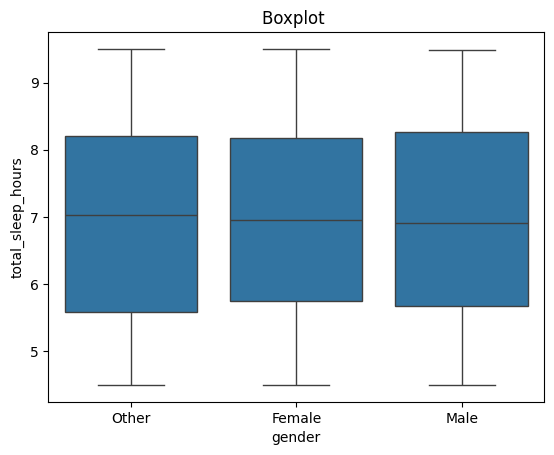

In [ ]:
sns.boxplot(x=df_unique['gender'], y=df_unique['total_sleep_hours'])
plt.title('Boxplot ')
plt.show()


In [ ]:
result = pd.crosstab(df_unique['sleep_quality'], df_unique['productivity_score'])

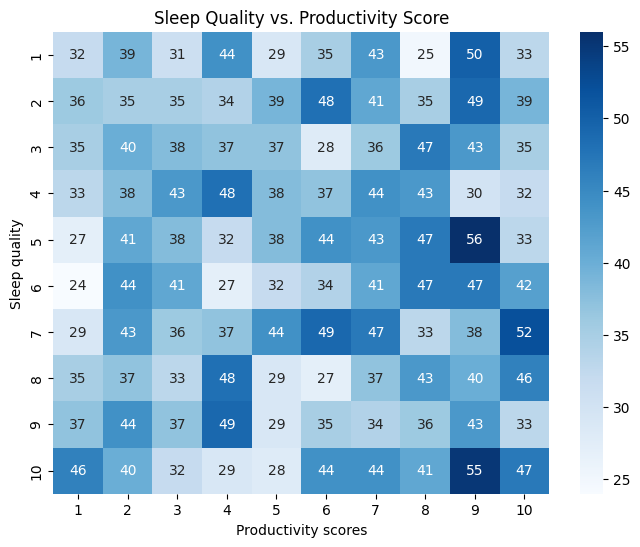

In [ ]:
crosstab_1 = pd.crosstab(df_unique['sleep_quality'], df_unique['productivity_score'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab_1, annot=True, cmap="Blues", fmt="d")
plt.title("Sleep Quality vs. Productivity Score")
plt.xlabel("Productivity scores")
plt.ylabel("Sleep quality")
plt.show()

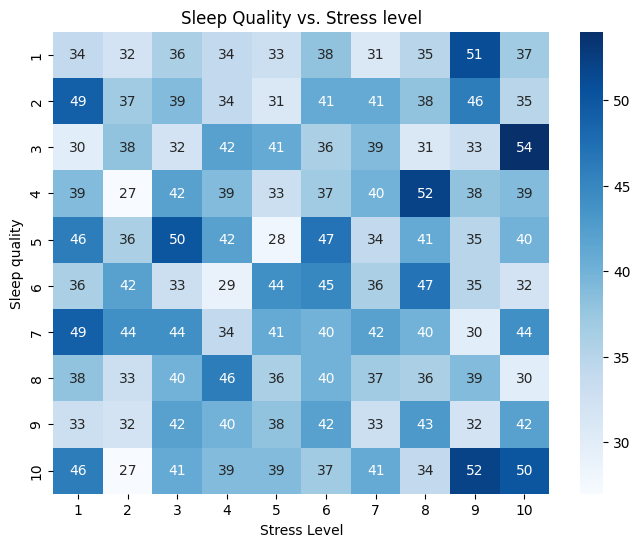

In [ ]:
crosstab_2 = pd.crosstab(df_unique['sleep_quality'], df_unique['stress_level'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab_2, annot=True, cmap="Blues", fmt="d")
plt.title("Sleep Quality vs. Stress level")
plt.xlabel("Stress Level")
plt.ylabel("Sleep quality")
plt.show()

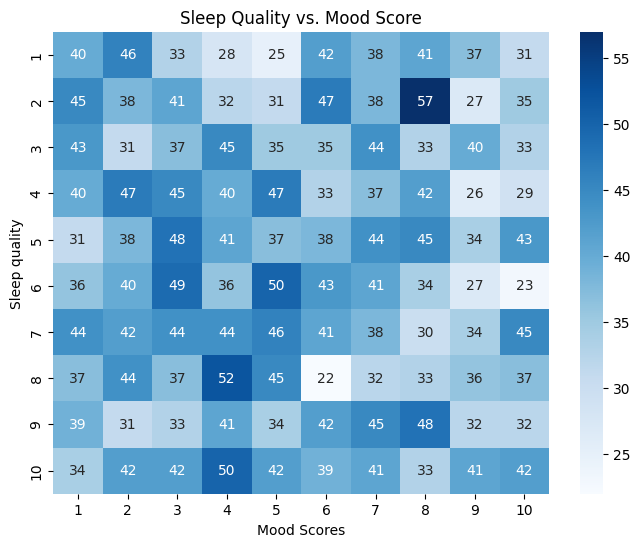

In [ ]:
crosstab_3 = pd.crosstab(df_unique['sleep_quality'], df_unique['mood_score'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab_3, annot=True, cmap="Blues", fmt="d")
plt.title("Sleep Quality vs. Mood Score")
plt.xlabel("Mood Scores")
plt.ylabel("Sleep quality")
plt.show()

In [ ]:
df_unique

,person_id,age,gender,sleep_start_time,sleep_end_time,total_sleep_hours,sleep_quality,excercise_mins_per_day,caffeine_intake_mg,screen_mins_before_bed,work_hours_per_day,productivity_score,mood_score,stress_level
0,1860,32,Other,23:20,4:37,5.28,3,86,87,116,8.81,8,3,6
1,1769,41,Female,21:01,2:26,5.41,5,32,21,88,6.33,10,3,7
2,2528,20,Male,22:06,3:27,5.35,7,17,88,59,8.51,10,9,10
3,8041,37,Other,23:06,6:39,7.55,8,46,34,80,6.07,8,4,2
4,4843,46,Other,21:25,4:10,6.75,10,61,269,94,11.37,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,1594,30,Other,23:56,5:40,5.73,5,88,95,100,7.93,8,2,1
4995,5192,38,Female,22:47,4:09,5.37,1,55,216,96,9.38,5,2,1
4996,7134,55,Male,21:29,5:23,7.91,4,70,81,177,5.02,5,6,2
4998,4205,55,Other,23:28,7:52,8.40,9,15,87,161,7.09,8,1,6


In [ ]:
sleepandproduc = df_unique.groupby('total_sleep_hours')['productivity_score'].mean()
df_unique['bins'] = pd.cut(df_unique['total_sleep_hours'], bins= np.arange(4, 11, 1))
sleepandproduc = df_unique.groupby('bins')[['productivity_score', 'stress_level', 'mood_score', 'sleep_quality']].mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_19132\3703438453.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleepandproduc = df_unique.groupby('bins')[['productivity_score', 'stress_level', 'mood_score', 'sleep_quality']].mean()


In [ ]:
sleepandproduc

,productivity_score,stress_level,mood_score,sleep_quality
bins,,,,
"(4, 5]",5.566910,5.712895,5.676399,5.318735
"(5, 6]",5.543726,5.506971,5.277567,5.750317
"(6, 7]",5.677207,5.537549,5.200264,5.397892
"(7, 8]",5.740157,5.631234,5.612861,5.515748
"(8, 9]",5.660403,5.455034,5.277852,5.676510
"(9, 10]",5.693878,5.456633,5.380102,5.461735


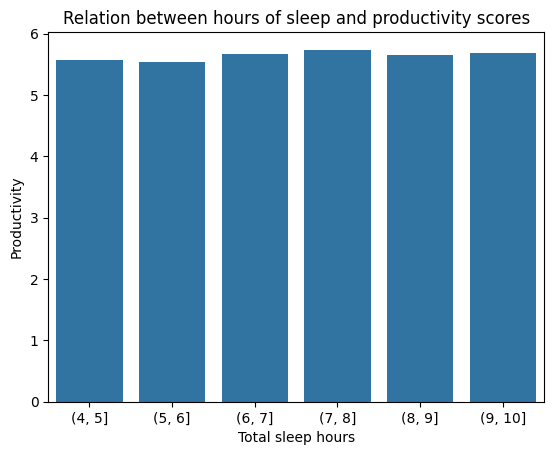

In [ ]:
sns.barplot(x='bins', y='productivity_score', data=sleepandproduc)
plt.xlabel("Total sleep hours")  # X-axis label
plt.ylabel("Productivity");  # Y-axis label
plt.title("Relation between hours of sleep and productivity scores");  # Add a title

<Axes: xlabel='bins', ylabel='mood_score'>

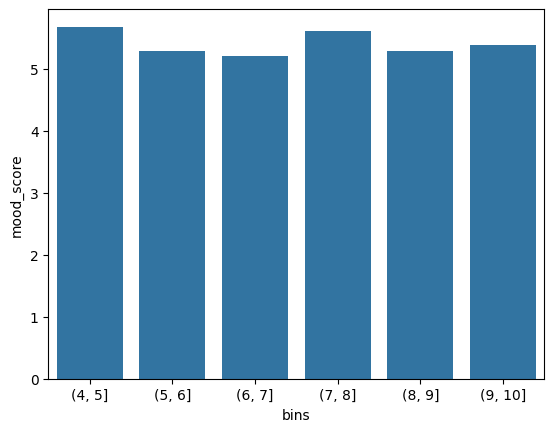

In [ ]:
sns.barplot(x='bins', y='mood_score', data=sleepandproduc)

<Axes: xlabel='bins', ylabel='stress_level'>

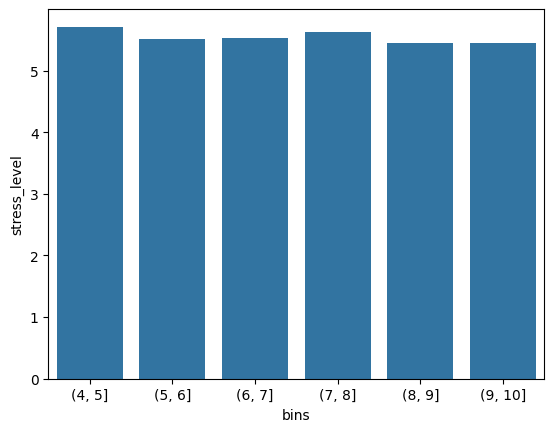

In [ ]:
sns.barplot(x='bins', y='stress_level', data=sleepandproduc)

Text(0.5, 1.0, 'Relationship between sleep duration and sleep quality')

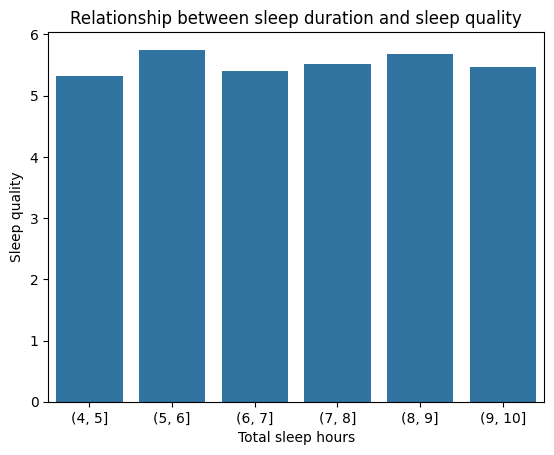

In [ ]:
sns.barplot(x='bins', y='sleep_quality', data=sleepandproduc)
plt.xlabel("Total sleep hours")  # X-axis label
plt.ylabel("Sleep quality");  # Y-axis label
plt.title("Relationship between sleep duration and sleep quality")  # Add a title

In [ ]:
moodscore = df_unique.groupby('mood_score')[['productivity_score', 'stress_level', 'sleep_quality']].mean()

<Axes: xlabel='mood_score', ylabel='stress_level'>

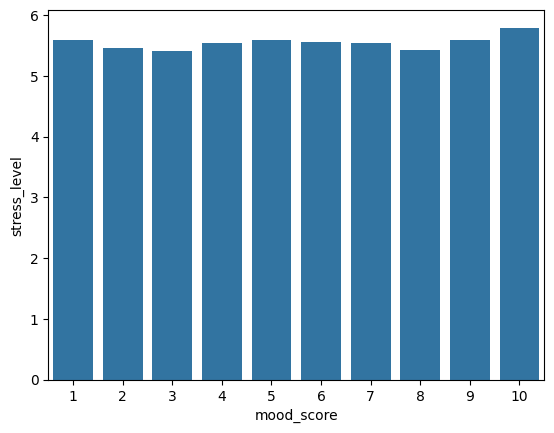

In [ ]:
sns.barplot(x='mood_score', y='stress_level', data=moodscore)

<Axes: xlabel='mood_score', ylabel='stress_level'>

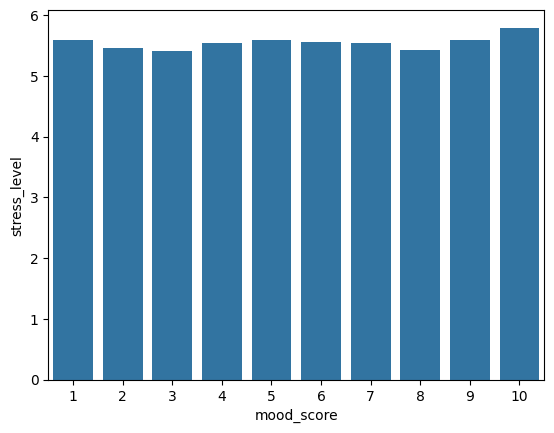

In [ ]:
sns.barplot(x='mood_score', y='stress_level', data=moodscore)

In [ ]:
moodscore = df_unique.groupby('mood_score')[['productivity_score', 'stress_level', 'sleep_quality']].mean()

In [ ]:
contingency_table = pd.crosstab(df_unique["sleep_quality"], df_unique["mood_score"])

# Step 2: Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Step 3: Interpret the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Step 4: Check significance
alpha = 0.05  # 5% significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

Chi-Square Statistic: 93.30555346018909
P-value: 0.16513739308188083
Degrees of Freedom: 81
Fail to reject the null hypothesis: No significant relationship.


In [ ]:
contingency_table2 = pd.crosstab(df_unique["sleep_quality"], df_unique["stress_level"])

# Step 2: Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table2)

# Step 3: Interpret the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Step 4: Check significance
alpha = 0.05  # 5% significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

Chi-Square Statistic: 75.58397102981053
P-value: 0.6490249233667477
Degrees of Freedom: 81
Fail to reject the null hypothesis: No significant relationship.


In [ ]:
contingency_table3 = pd.crosstab(df_unique["sleep_quality"], df_unique["productivity_score"])

# Step 2: Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table3)

# Step 3: Interpret the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Step 4: Check significance
alpha = 0.05  # 5% significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

Chi-Square Statistic: 88.72514791929002
P-value: 0.2608710014290371
Degrees of Freedom: 81
Fail to reject the null hypothesis: No significant relationship.


In [ ]:
float(df_unique['total_sleep_hours'].corr(df_unique['caffeine_intake_mg'], method="spearman")) 

0.0241105058387183

In [ ]:
sleepandcaf = df_unique.groupby('caffeine_intake_mg')[['sleep_quality', 'stress_level']].mean()
df_unique['bins2'] = pd.cut(df_unique['caffeine_intake_mg'], bins=np.arange(0, 310, 50), include_lowest=True)
df_unique['bins2'] = df_unique['bins2'].apply(lambda x: f"{int(x.left)}-{int(x.right)} mg")
sleepandcaf = df_unique.groupby('bins2')['sleep_quality'].mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_19132\1412256175.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleepandcaf = df_unique.groupby('bins2')['sleep_quality'].mean()


In [ ]:
sleepandcaf = sleepandcaf.to_frame()

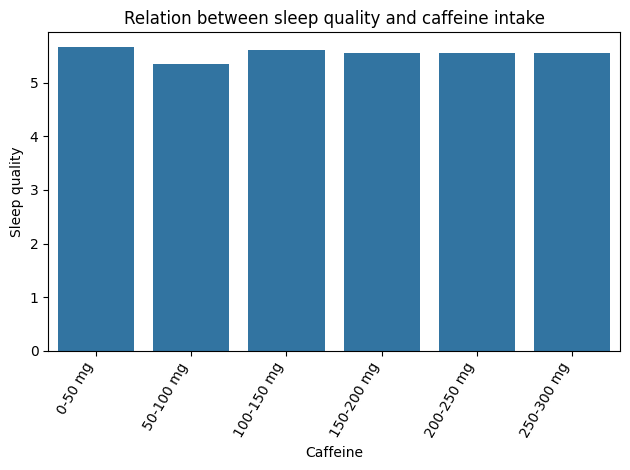

In [ ]:
sns.barplot(x='bins2', y='sleep_quality', data=sleepandcaf)
plt.xlabel("Caffeine")  # X-axis label
plt.ylabel("Sleep quality");  # Y-axis label
plt.title("Relation between sleep quality and caffeine intake")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()




In [ ]:
print(sleepandcaf.columns)


Index(['sleep_quality'], dtype='object')


In [ ]:
sleepandex = df_unique.groupby('excercise_mins_per_day')['sleep_quality'].mean()
df_unique['bins3'] = pd.cut(df_unique['excercise_mins_per_day'], bins=np.arange(0, 100, 10), include_lowest=True)
bin_labels = [f"{i}-{i+9} mins" for i in range(0, 100, 10)]
df_unique['bin_labels'] = pd.cut(df_unique['excercise_mins_per_day'], bins=np.arange(0, 101, 10), labels=bin_labels, include_lowest=True)
sleepandex = df_unique.groupby('bins3')['sleep_quality'].mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_19132\1147221243.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleepandex = df_unique.groupby('bins3')['sleep_quality'].mean()


In [ ]:
sleepandex = sleepandex.to_frame()

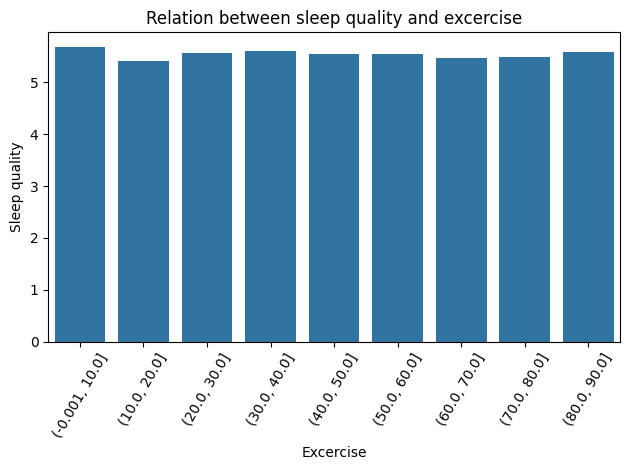

In [ ]:
sns.barplot(x='bins3', y='sleep_quality', data=sleepandex)
plt.xlabel("Excercise")  # X-axis label
plt.ylabel("Sleep quality");  # Y-axis label
plt.title("Relation between sleep quality and excercise")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
screen_sleep_quality = df_unique.groupby('screen_mins_before_bed')['sleep_quality'].mean()
screen_bins = np.arange(0, 180, 10)
screen_bin_labels = [f"{i}-{i+9} mins" for i in range(0, 170, 10)]
df_unique['screen_bins'] = pd.cut(df_unique['screen_mins_before_bed'], bins=screen_bins, include_lowest=True)
df_unique['screen_bins_labels'] = pd.cut(df_unique['screen_mins_before_bed'], bins=screen_bins, labels=screen_bin_labels, include_lowest=True)
screen_sleep_quality = df_unique.groupby('screen_bins_labels')['sleep_quality'].mean()


C:\Users\PC\AppData\Local\Temp\ipykernel_19132\2692733621.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  screen_sleep_quality = df_unique.groupby('screen_bins_labels')['sleep_quality'].mean()


In [ ]:
screen_sleep_quality = screen_sleep_quality.to_frame()

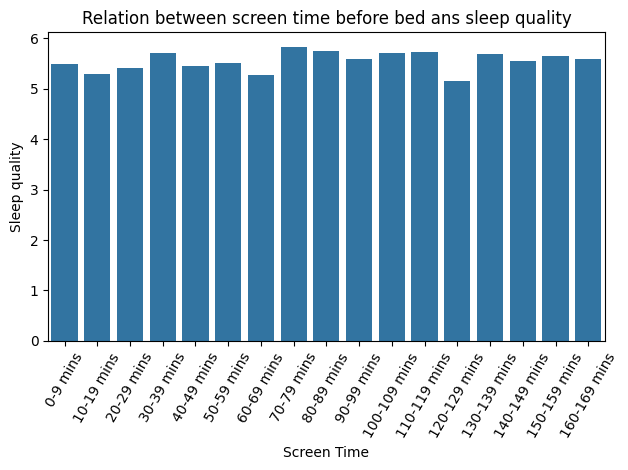

In [ ]:
sns.barplot(x='screen_bins_labels', y='sleep_quality', data=screen_sleep_quality)
plt.xlabel("Screen Time")  # X-axis label
plt.ylabel("Sleep quality");  # Y-axis label
plt.title("Relation between screen time before bed ans sleep quality")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()